<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded=files.upload()

Saving projdata.csv to projdata.csv
Saving projdata_test_set.csv to projdata_test_set.csv


In [0]:
df=pd.read_csv(io.StringIO(uploaded['projdata.csv'].decode("utf-8")),engine='python',sep=",")
df1=pd.read_csv(io.StringIO(uploaded['projdata_test_set.csv'].decode("utf-8")),engine='python',sep=",")

ds=df.sample(frac=1)
ds1=df1.sample(frac=1)

In [0]:
Y_train=ds.as_matrix(columns=ds.columns[3:4])
X_train=ds.as_matrix(columns=ds.columns[0:3])
X_test=ds1.as_matrix(columns=ds1.columns[0:3])
Y_test=ds1.as_matrix(columns=ds1.columns[3:4])

In [0]:
model=tf.keras.Sequential()

In [15]:
model.add(layers.Dense(10,input_shape=(3,),activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy',optimizer=tf.train.AdamOptimizer(0.001),metrics=['accuracy'])

In [17]:
history=model.fit(X_train,Y_train,validation_split=0.25,epochs=450,batch_size=128)

Train on 2371 samples, validate on 791 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/450
2371/2371 [==============================] - 1s 430us/sample - loss: 0.6393 - acc: 0.5728 - val_loss: 0.5578 - val_acc: 0.6966
Epoch 2/450
2371/2371 [==============================] - 0s 36us/sample - loss: 0.5098 - acc: 0.7014 - val_loss: 0.4900 - val_acc: 0.6966
Epoch 3/450
2371/2371 [==============================] - 0s 35us/sample - loss: 0.4821 - acc: 0.7014 - val_loss: 0.4788 - val_acc: 0.6966
Epoch 4/450
2371/2371 [==============================] - 0s 35us/sample - loss: 0.4724 - acc: 0.7014 - val_loss: 0.4698 - val_acc: 0.6966
Epoch 5/450
2371/2371 [==============================] - 0s 37us/sample - loss: 0.4634 - acc: 0.7014 - val_loss: 0.4615 - val_acc: 0.6979
Epoch 6/450
2371/2371 [==============================] - 0s 36us/sample - loss: 0.4542 - acc: 0.7014 - val_loss: 0.4510 - val_acc: 0.6979
Epoch 7/450
2371/2371 [==============================] - 0s 38us/sample - lo

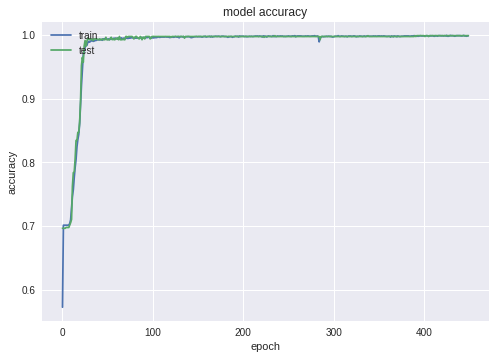

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

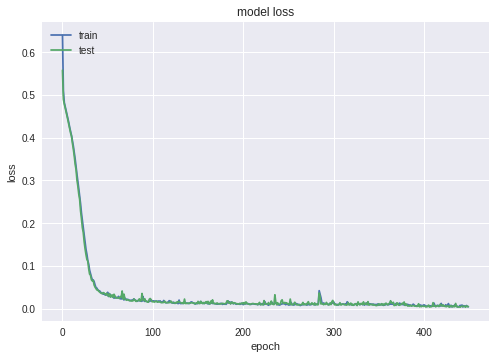

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=64)
print(test_acc)

125/125 [==============================] - 0s 61us/sample - loss: 0.5949 - acc: 0.9280
0.928
